<a href="https://colab.research.google.com/github/Andres-Gress/Procesos-Estocasticos/blob/main/CaminataAleatoria_ProcEstoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAMINATA ALEATORIA

Código que implementa una camita aleatoria 1D, con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda, tal que $p + q = 1.$

In [1]:
import random as r
import matplotlib.pyplot as plt
import numpy as np

Se importan las librerias:


*   Random para generar números aleatorios pertenecientes a una distribución uniforme, es decir, números entre $0$ y $1.$
*   Matplotlib.pyplot para gráficar


In [2]:
def caminata_aleatoria(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random()
    if a < p:
      posicion=posicion+1
    else:
      posicion=posicion-1
    camino.append(posicion)
  plt.plot(camino, color='blue')
  plt.title("Caminata Aleatoria")
  plt.xlabel("Número de pasos")
  plt.ylabel("Posición")
  plt.axhline(0.0, linestyle='--', color='red')
  plt.grid(True)
  plt.show()

  return camino

Se crea una función de nombre "caminata_aleatoria" la cual tiene como entradas $n $ que vendría siendo el número de pasos que dará ya sea izquierda o derecha y $p$ que es la probabilidad con la que se moverá a la derecha, de ahí se desglosa también $q$ pero no es necesario ponerla ya que es complemento de $p$

Dentro de la función se inicia la posición en el origen, es decir en $0$; se crea un arreglo que guardará la última posición. Se implementa la creación de números aleatorios de los cuales dependerá si se mueve a izquierda o derecha con una probabilidad $p$ y finalmente gráfica la trayectoria que siguió despues de $n$ pasos

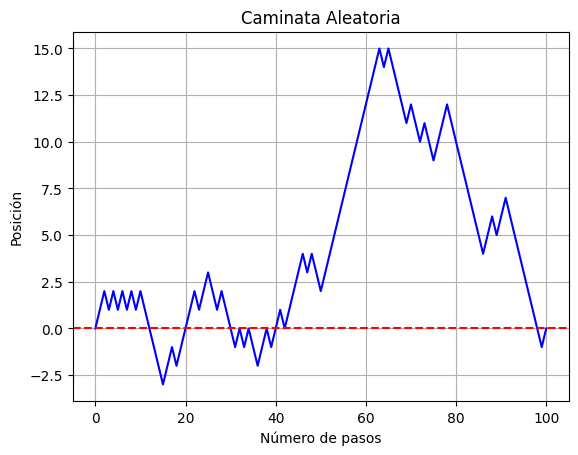

In [3]:
n=100 #Número de pasos
p=0.5 #Probabilidad p
_=caminata_aleatoria(n,p) #Se pone _= para que no genere la lista de los n datos, ya que solo se quiere ver la gráfica

Gráfica de la trayectoria con una línea punteada en el origen para así observar las veces que se fue a izquierda o derecha (se hizo la gráficca vertical para apreciar mejor la trayectoria, pero izquierda vendría siendo la parte inferior a la linea roja y derecha la parte superior después de la línea punteada).

Ya que dicha trayectoria depende de números pseudoaleatorios, cada una es diferente, pero se puede "favorecer" la trayectoria aumentando o disminuyendo probabilidad, es decir, el valor de $p$. Pero se deja con una igualdad de probabilidad, esto es: $p=0.5$

#Análisis y Preguntas

En cada iteración se obtiene algo totalmente diferente y curioso; pero dentro del poder de desición se tienen 2 variables que alteran cada resultado, estas variables son: $n$ y $p$ con un n adecuado se puede apreciar mejor la trayectoria, pero tampoco puede ser demasiado grande porque saturaría la gráfica, por lo que se opto por dejar $n=100$ es un número bastante considerable, pero en $p$ si hay grandes diferencias, ya que una medida neutra sería $p=0.5$, no favorece especificamente a izquierda o derecha, a partir de aquí se pueden destacar dos casos:

$casos = \left\{\begin{matrix}
p<0.5 \\ p>0.5
\end{matrix}\right.$

Si se elige el caso 1 sería de esperar que la gráfica parezca en tener una pendiente negativa, de manera análoga el caso 2 con pendiente positiva.
A pesar de ello no es del todo una recta, ya que aunque la probabilidad no favorezca si toman valores poco probables y si a esto se aumenta a $n$.

$n → ∞$

Por ley de los grandes números tendería a ser una recta, pero también influye que tan alejada es la probabilidad de la media, si no está muy dispersa, es poca la variabilidad, pero cuando se aleja demasiado, y con $n$ grande, se cumple la ley de los grandes números.

Esto lleva a cuestionarse ciertos casos, por ejemplo:

1.   Con una probabilidad igualitaria, ¿Cuál es el promedio de que se regrese al origen?
2.   Si se tiene un $n$ pequeño ¿se ve muy afectada la trayectoria si se favorece con probabilidad a izquierda o derecha?
3.   ¿Cuál es la máxima distancia que alcanza con p igualitario?
4.   ¿Cuál es la mínima distancia que alcanza?

#Pregunta 1

#Con una probabilidad igualitaria, ¿Cuál es el promedio de que regrese al origen?

Solución y respuesta:

In [4]:
def caminata_aleatoria_datos(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random()
    if a < p:
      posicion=posicion+1
    else:
      posicion=posicion-1
    camino.append(posicion)
  return camino

Se vuelve a llamar a la función "caminata_aleatoria" pero sin el apartado que gráfica para así solo analizar los datos y se cambia e nombre para que no afecte si posteriormente se desea graficar nuevamente

In [5]:
def origen(m, n, p):
    ceros = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        cantidad_ceros = camino.count(0)  # cuenta cuántas veces aparece 0
        ceros.append(cantidad_ceros)

    promedio = np.mean(ceros)
    return print("El promedio de veces que se regresa al origen es: ", promedio)

Se crea la función "origen" que realiza m iteraciones de la función caminata_aleatoria, cuenta los $0$ que hay en cada iteración, los guarda en una lista y posteriormente obtiene el promedio de dicha lista

In [6]:
m=100
n=100
p=0.5
origen(m, n, p)

El promedio de veces que se regresa al origen es:  7.12


Aquí el promedio de la lista con m valores, en cada iteración cambia, pero dicho promedio se encuentre aproximadamente entre un rango de $[6,9]$, esto cuando $p=0.5$, son equiprobables

#Pregunta 2

#Si se tiene un $n$ pequeño ¿se ve muy afectada la trayectoria si se favorece con probabilidad a izquierda o derecha?

Solución y respuesta:

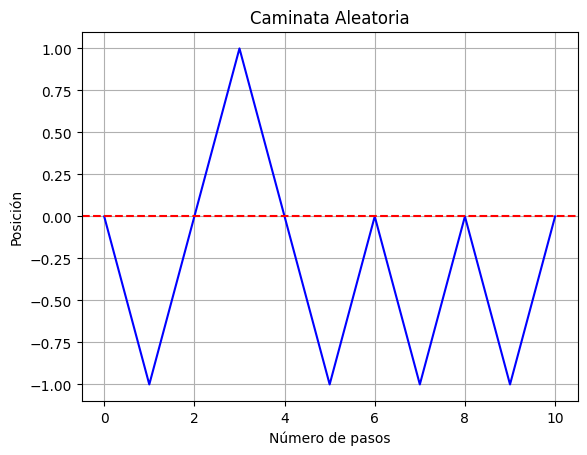

In [23]:
n=10
p=0.2
_=caminata_aleatoria(n,p)

Gráfica con $n, p$ pequeños, aunque la probabilidad favorezca al lado izquierda, por los pocos pasos que se dan, tiende a comportarse de manera no tan esperada

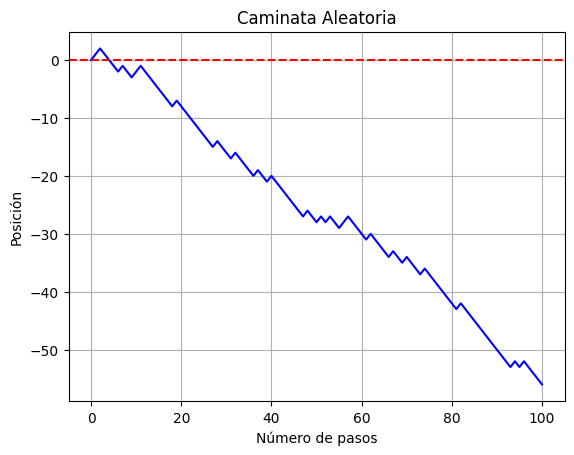

In [24]:
n=100
p=0.2
_=caminata_aleatoria(n,p)

Si influye n en la vista de la trayectoria, ya que con un $p$ alejado de la media, el recorrido puede arrojar un comportamiento parecido al de un $p$ equitativo, por otro lado para un $n$ grande se aprecia la ventaja hacia el lado izquierdo cuando $p$ es pequeño.
De manera análoga si $p$ es grande

#Pregunta 3

#¿Cuál es la máxima distancia que alcanza con p igualitario?

Solución y respuesta:

In [9]:
def maximo(m, n, p):
    maximos = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        max_caminata = max(camino)  # encuentra el máximo de esta caminata
        maximos.append(max_caminata)

    promedio = np.mean(maximos)
    return print("El máximo número que alcanza en promedio es: ", promedio)

Se crea una función análoga a la que busca los ceros, pero en esta ocasión, busca al máximo de cada iteración, los enlista y se saca el promedio

In [10]:
m=100
n=100
p=0.5

maximo(m,n,p)

El máximo número que alcanza en promedio es:  7.04


Se aprecía que el máximo parece tener una cota, ya que no crece de manera exponencial, esto también es debido a la probabilidad igualitaria, en otro caso, el máximo tiende a aumentar

#Pregunta 4

#¿Cuál es la mínima distancia que alcanza con p igualitario?

Solución y respuesta:

In [11]:
def minimo(m, n, p):
    minimos = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        min_caminata = min(camino)  # encuentra el máximo de esta caminata
        minimos.append(min_caminata)

    promedio = np.mean(minimos)
    return print("El mínimo número que alcanza en promedio es: ", promedio)

Se crea una función análoga a la de máximos, pero en esta ocasión, busca al mínimo

In [12]:
m=100
n=100
p=0.5

minimo(m,n,p)

El mínimo número que alcanza en promedio es:  -7.61


Aquí se observa un dato muy interesante, el cuál es que el promedio de máximos y mínimos pareciera ser en forma de espejo, ya que ambos oscilan entre los mismos valores pero con signo contrario